<a href="https://colab.research.google.com/github/BhavyaChaturvedi20/Open-Invention-Hackeeqat-/blob/main/Hackathon_Bird_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Importing the dataset from Kaggle consisting of labelled images of over 230 bird species

In [ ]:
 ! pip install -q kaggle



In [ ]:
# Upload the kaggle.json file which gives access to kaggle dataset

from google.colab import files

files.upload() 



Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"sudarshan666","key":"133cc613c77a332a61dc1b00db094df0"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Downloading the Kaggle dataset using the Kaggle API 

! kaggle datasets download -d gpiosenka/100-bird-species

100-bird-species.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Unzipping the dataset and storing locally 

!unzip -qq \*.zip 


replace consolidated/AFRICAN CROWNED CRANE/001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

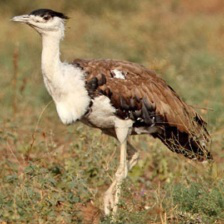

In [ ]:
from PIL import Image
import os

Image.open('/content/train/INDIAN BUSTARD/010.jpg')

In [ ]:
# Printing the all the bird classes 

bird_species_list = (os.listdir('/content/train'))

print(len(bird_species_list)) , bird_species_list

230


(None,
 ['AFRICAN CROWNED CRANE',
  'STRAWBERRY FINCH',
  'SUPERB STARLING',
  'SPOONBILL',
  'GREEN JAY',
  'HOUSE SPARROW',
  'LILAC ROLLER',
  'TEAL DUCK',
  'EMU',
  'GOLDEN CHLOROPHONIA',
  'TOWNSENDS WARBLER',
  'DOWNY WOODPECKER',
  'JABIRU',
  'BALTIMORE ORIOLE',
  'PARADISE TANAGER',
  'RED HEADED DUCK',
  'GAMBELS QUAIL',
  'WHITE NECKED RAVEN',
  'BLACK VULTURE',
  'BANANAQUIT',
  'EVENING GROSBEAK',
  'COMMON STARLING',
  'STRIPPED SWALLOW',
  'BARN OWL',
  'RED WINGED BLACKBIRD',
  'MASKED LAPWING',
  'BLACKBURNIAM WARBLER',
  'NORTHERN GANNET',
  'EASTERN ROSELLA',
  'CURL CRESTED ARACURI',
  'ROADRUNNER',
  'BAR-TAILED GODWIT',
  'EASTERN TOWEE',
  'RUFOUS KINGFISHER',
  'BLUE HERON',
  'HARPY EAGLE',
  'PHILIPPINE EAGLE',
  'INCA TERN',
  'VERMILION FLYCATHER',
  'DARK EYED JUNCO',
  'MOURNING DOVE',
  'EASTERN MEADOWLARK',
  'WHIMBREL',
  'CHARA DE COLLAR',
  'ELLIOTS  PHEASANT',
  'TAIWAN MAGPIE',
  'ALBATROSS',
  'HOOPOES',
  'SMITHS LONGSPUR',
  'ANTBIRD',
  'COMMON

In [ ]:
# Importing all the required libraries so that we can use for functions 

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img,img_to_array



In [ ]:
"""
!pip3 install -q fastai==2.1.3
from fastai.vision.all import *
from fastbook import *
import fastai 
import fastcore
fastbook.setup_book()

train_path = "/content/train"
path_dir = Path(train_path)
Path.BASE_PATH = path_dir
path_dir.ls()


birds = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

dls = birds.dataloaders(path_dir)
"""

'\n!pip3 install -q fastai==2.1.3\nfrom fastai.vision.all import *\nfrom fastbook import *\nimport fastai \nimport fastcore\nfastbook.setup_book()\n\ntrain_path = "/content/train"\npath_dir = Path(train_path)\nPath.BASE_PATH = path_dir\npath_dir.ls()\n\n\nbirds = DataBlock(\n    blocks=(ImageBlock, CategoryBlock), \n    get_items=get_image_files, \n    splitter=RandomSplitter(valid_pct=0.2, seed=42),\n    get_y=parent_label,\n    item_tfms=Resize(128))\n\ndls = birds.dataloaders(path_dir)\n'

In [ ]:
# 

train_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)


In [ ]:

train_directory='/content/train'
val_directory='/content/valid'
test_directory='/content/test'


In [ ]:
train_generator=train_datagen.flow_from_directory(train_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size= 256)

val_generator=val_datagen.flow_from_directory(val_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size= 256)

test_generator=test_datagen.flow_from_directory(test_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size= 256)


Found 32025 images belonging to 230 classes.
Found 1150 images belonging to 230 classes.
Found 1150 images belonging to 230 classes.


FOR EXPERIMENTATION IGNORE 

In [ ]:
from keras.applications import ResNet50		

my_convlayer =ResNet50		(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=(224,224,3))


for layer in my_convlayer.layers :
  layer.trainable = False


94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
my_model = Sequential()
my_model.add(my_convlayer)
my_model.add(Dropout(0.5))
my_model.add(Flatten())
my_model.add(BatchNormalization())
my_model.add(Dense(2048,kernel_initializer='he_uniform'))
my_model.add(BatchNormalization())
my_model.add(Activation('relu'))
my_model.add(Dropout(0.5))
my_model.add(Dense(1024,kernel_initializer='he_uniform'))
my_model.add(BatchNormalization())
my_model.add(Activation('relu'))
my_model.add(Dropout(0.5))
my_model.add(Dense(230,activation='softmax'))
print(my_model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
dropout_12 (Dropout)         (None, 7, 7, 2048)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 100352)            0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 100352)            401408    
_________________________________________________________________
dense_12 (Dense)             (None, 2048)              205522944 
_________________________________________________________________
batch_normalization_17 (Batc (None, 2048)              8192      
_________________________________________________________________
activation_8 (Activation)    (None, 2048)             

In [ ]:
opt=tf.keras.optimizers.Adam(lr=0.01)
my_model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=opt)

In [ ]:
my_history = my_model.fit(train_generator,validation_data=val_generator,epochs=4)

Epoch 1/4
 66/126 [==============>...............] - ETA: 59s - loss: 5.7392 - accuracy: 0.0352 

KeyboardInterrupt: ignored

-------- FOR RESNET101V2--------
Epoch 1/4
126/126 [==============================] - 189s 2s/step - loss: 2.1591 - accuracy: 0.5354 - val_loss: 0.3656 - val_accuracy: 0.8957
Epoch 2/4
126/126 [==============================] - 187s 1s/step - loss: 0.4252 - accuracy: 0.8973 - val_loss: 0.2238 - val_accuracy: 0.9409
Epoch 3/4
126/126 [==============================] - 187s 1s/step - loss: 0.1546 - accuracy: 0.9684 - val_loss: 0.2020 - val_accuracy: 0.9417
Epoch 4/4
126/126 [==============================] - 187s 1s/step - loss: 0.0761 - accuracy: 0.9859 - val_loss: 0.1832 - val_accuracy: 0.9513

In [ ]:
my_model.evaluate(test_generator)

5/5 [==============================] - 5s 904ms/step - loss: 0.1075 - accuracy: 0.9739


[0.10751291364431381, 0.9739130139350891]

ACTUAL MODEL ALREADY TRAINED 

In [ ]:
from keras.applications import ResNet101V2
convlayer=ResNet101V2(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in convlayer.layers:
    layer.trainable=False

In [ ]:
model=Sequential()
model.add(convlayer)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(230,activation='softmax'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101v2 (Functional)     (None, 7, 7, 2048)        42626560  
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 7, 2048)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 100352)            0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 100352)            401408    
_________________________________________________________________
dense_9 (Dense)              (None, 2048)              205522944 
_________________________________________________________________
batch_normalization_10 (Batc (None, 2048)              8192      
_________________________________________________________________
activation_6 (Activation)    (None, 2048)             

In [ ]:
opt=tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=opt)

In [ ]:
history=model.fit(train_generator,validation_data=val_generator,
         epochs=5)

Epoch 1/5
126/126 [==============================] - 179s 1s/step - loss: 2.1475 - accuracy: 0.5396 - val_loss: 0.3690 - val_accuracy: 0.9000
Epoch 2/5
126/126 [==============================] - 177s 1s/step - loss: 0.4297 - accuracy: 0.8960 - val_loss: 0.2408 - val_accuracy: 0.9322
Epoch 3/5
126/126 [==============================] - 176s 1s/step - loss: 0.1543 - accuracy: 0.9666 - val_loss: 0.1945 - val_accuracy: 0.9478
Epoch 4/5
126/126 [==============================] - 176s 1s/step - loss: 0.0769 - accuracy: 0.9856 - val_loss: 0.1758 - val_accuracy: 0.9513
Epoch 5/5
126/126 [==============================] - 177s 1s/step - loss: 0.0495 - accuracy: 0.9914 - val_loss: 0.1660 - val_accuracy: 0.9557


In [ ]:
opt=tf.keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=opt)
history_1=model.fit(train_generator,validation_data=val_generator,
         epochs=1)

 15/126 [==>...........................] - ETA: 2:30 - loss: 0.0376 - accuracy: 0.9942

KeyboardInterrupt: ignored

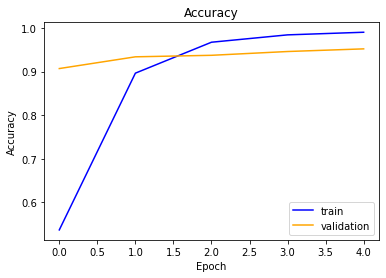

In [ ]:
plt.plot(history.history['accuracy'],c='blue')
plt.plot(history.history['val_accuracy'],c='orange')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

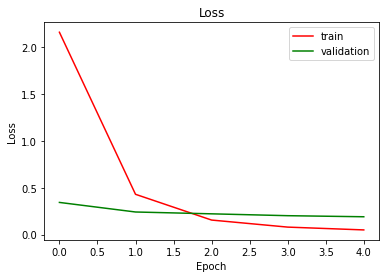

In [ ]:
plt.plot(history.history['loss'],c='red')
plt.plot(history.history['val_loss'],c='green')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')

In [ ]:
model.evaluate(test_generator)

5/5 [==============================] - 5s 944ms/step - loss: 0.1123 - accuracy: 0.9687


[0.11231585592031479, 0.9686956405639648]

In [ ]:
dic=train_generator.class_indices
icd={k:v for v,k in dic.items()}
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict_classes(img)
    probability=round(np.max(model.predict_proba(img)*100),2)
    #print ('Bird Is',icd[answer[0]], 'With probability',probability)
    print (probability, ' % chances are there that the Bird Is',icd[answer[0]])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


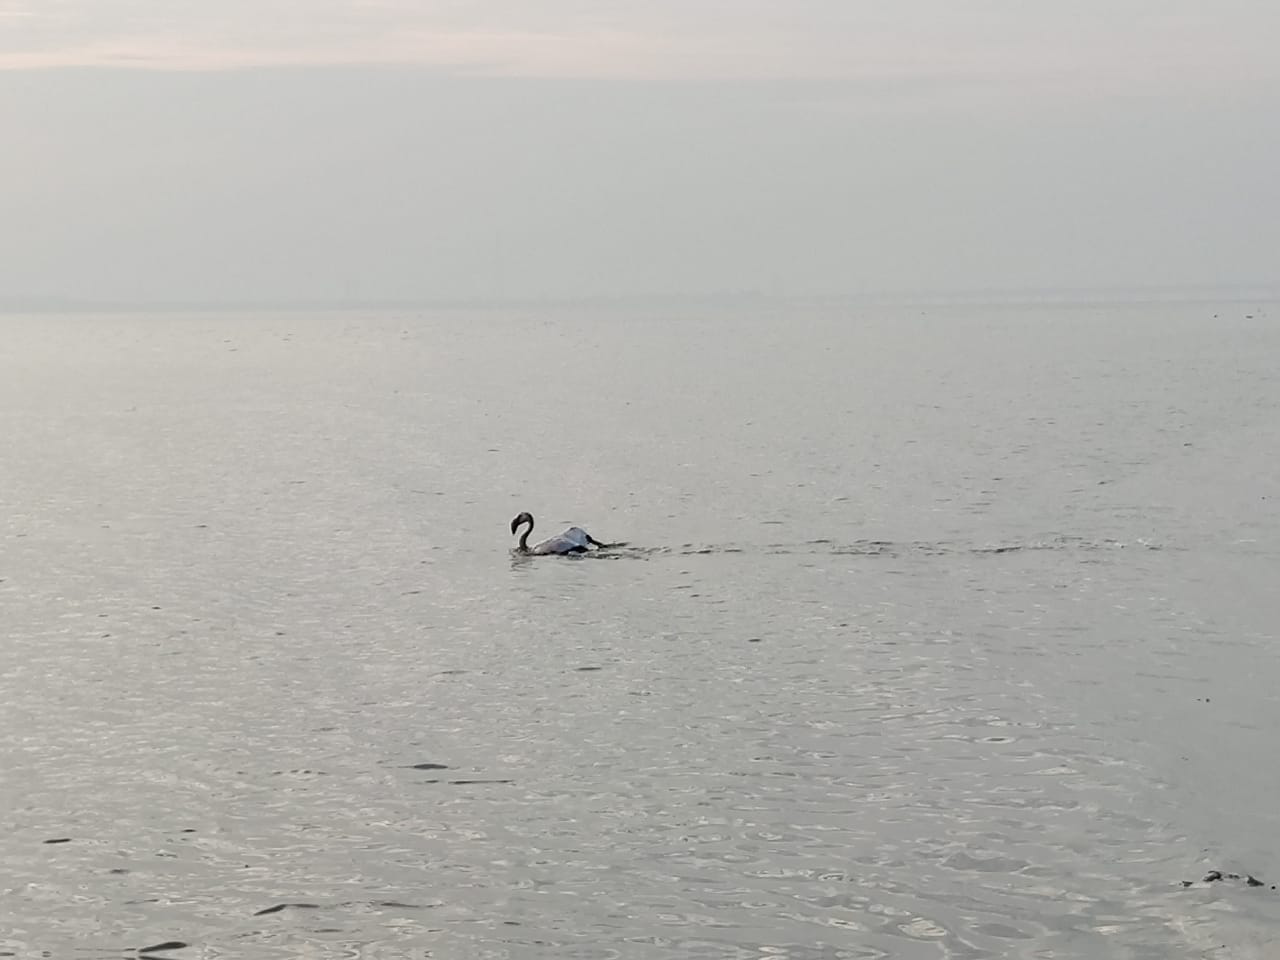

In [ ]:
bird_path = "/content/drive/MyDrive/Pictures/IMG-20201209-WA0019.jpg"
from PIL import Image 
Image.open(bird_path)

In [ ]:
output(bird_path)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Instructions for updating:
Please use `model.predict()` instead.
32.62  % chances are there that the Bird Is ALBATROSS


In [ ]:
bird2_path = "/content/drive/MyDrive/Pictures/IMG-20201209-WA0015.jpg"

output(bird2_path)


70.69  % chances are there that the Bird Is ALBATROSS


In [ ]:
img = Image.open(bird2_path)
img_array = (np.array(img))

ValueError: ignored

In [ ]:
bird3_path = "/content/drive/MyDrive/Pictures/IMG-20201209-WA0016.jpg"
output(bird_path)


32.62  % chances are there that the Bird Is ALBATROSS


In [ ]:
canary_path = "/content/drive/MyDrive/Pictures/canary.jfif"

output(canary_path)

37.47  % chances are there that the Bird Is CANARY


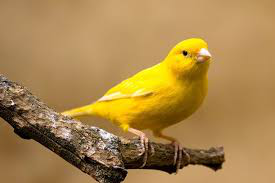

In [ ]:
Image.open(canary_path)

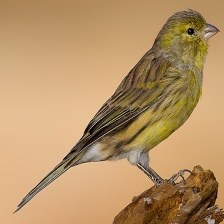

In [ ]:
Image.open("/content/train/CANARY/005.jpg")

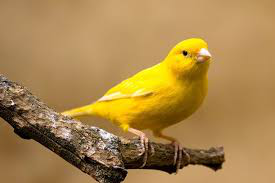

In [ ]:
img_canary = Image.open(canary_path)
img_canary

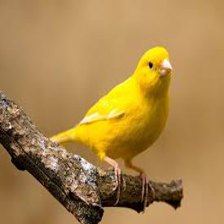

In [ ]:
newsize = (224,224)

new_canary = img_canary.resize(newsize)
new_canary

In [ ]:
X = []
generate_test = ImageDataGenerator(rescale=1/255)


test_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=256)

ValueError: ignored

AttributeError: ignored

In [ ]:
model.save("/content/drive/MyDrive/Hackathon model/Bird_model.h5")

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Hackathon model/Bird_model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101v2 (Functional)     (None, 7, 7, 2048)        42626560  
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 2048)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100352)            401408    
_________________________________________________________________
dense (Dense)                (None, 2048)              205522944 
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
activation (Activation)      (None, 2048)              0

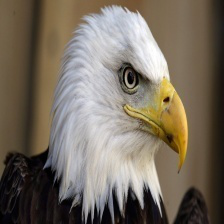

In [ ]:
location = "/content/train/BALD EAGLE/002.jpg"
img=load_img(location,target_size=(224,224,3))
img=img_to_array(img)
img=img/255
img=np.expand_dims(img,[0])
load_img(location)

In [ ]:
answer = new_model.predict_classes(img)
probability=round(np.max(new_model.predict_proba(img)*100),2)
print ('Bird Is',icd[answer[0]], 'With probability',probability)
print (probability, ' % chances are there that the Bird Is',icd[answer[0]])

Instructions for updating:
Please use `model.predict()` instead.


NameError: ignored

In [ ]:
answer[1]

IndexError: ignored

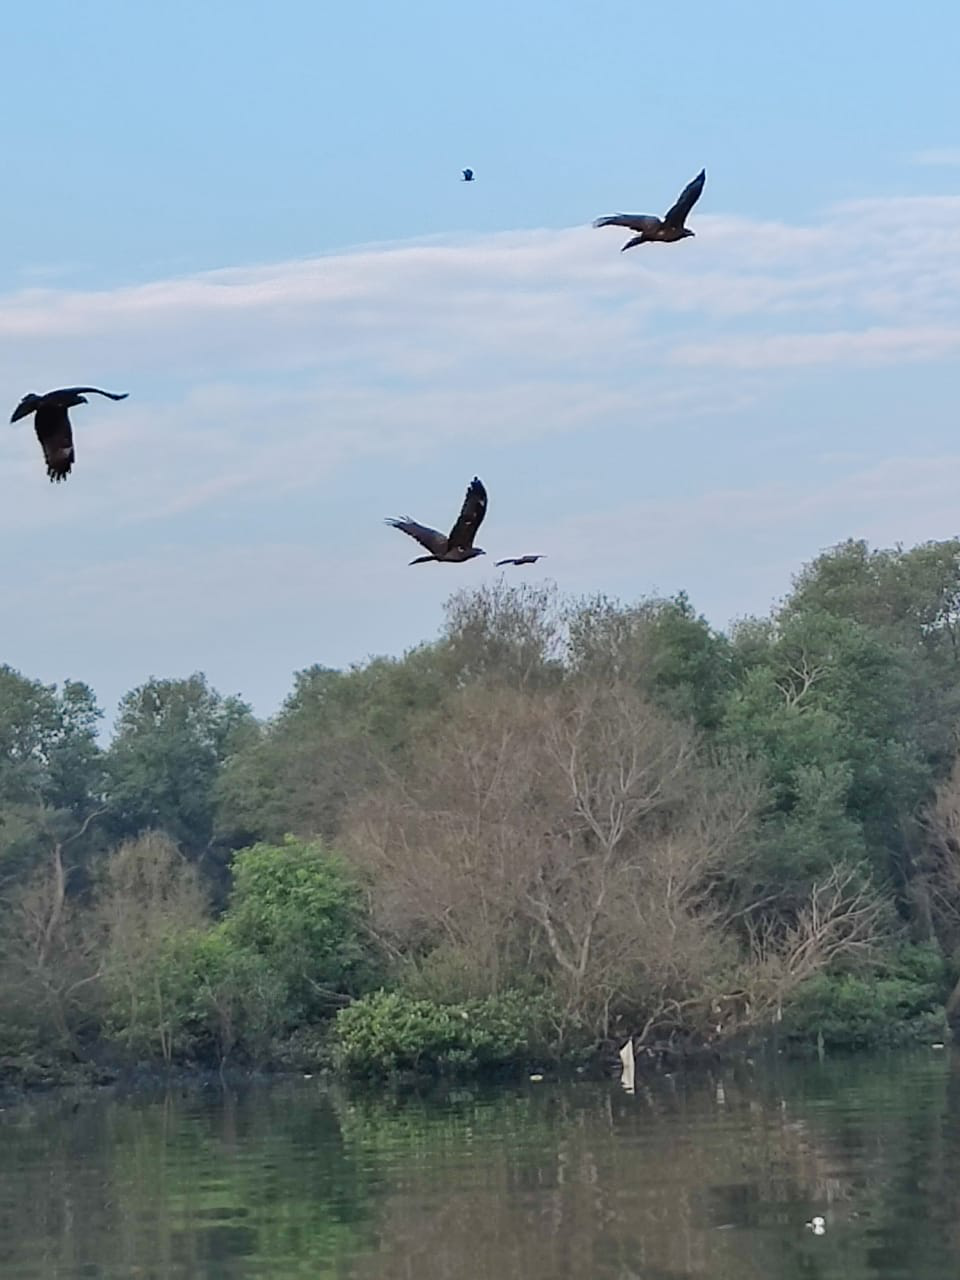

In [ ]:
bird_path = "/content/drive/MyDrive/Pictures/IMG-20201209-WA0015.jpg"
img=load_img(bird_path,target_size=(224,224,3))
img=img_to_array(img)
img=img/255
img=np.expand_dims(img,[0])
load_img(bird_path)

In [ ]:
nikita_path = "/content/drive/MyDrive/Pictures/IMG-20201210-WA0048.jpg"

img=load_img(nikita_path,target_size=(224,224,3))
img=img_to_array(img)
img=img/255
img=np.expand_dims(img,[0])
load_img(nikita_path)
answer = new_model.predict_classes(img)
probability=round(np.max(model.predict_proba(img)*100),2)
#print ('Bird Is',icd[answer[0]], 'With probability',probability)
print (probability, ' % chances are there that the Bird Is',icd[answer[0]])


18.45  % chances are there that the Bird Is HOUSE FINCH


feufof

In [ ]:
answer = new_model.predict_classes(img)
probability=round(np.max(model.predict_proba(img)*100),2)
#print ('Bird Is',icd[answer[0]], 'With probability',probability)
print (probability, ' % chances are there that the Bird Is',icd[answer[0]])

18.45  % chances are there that the Bird Is HOUSE FINCH


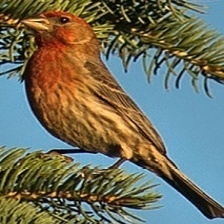

In [ ]:
Image.open('/content/train/HOUSE FINCH/005.jpg')

In [ ]:
!pip install tensorflowjs

#!tensorflowjs_converter --input_format keras "/content/drive/MyDrive/Hackathon model/Bird_model.h5" "/content/drive/MyDrive/Hackathon model"

SyntaxError: ignored

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Hackathon model/Bird_model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101v2 (Functional)     (None, 7, 7, 2048)        42626560  
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 2048)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100352)            401408    
_________________________________________________________________
dense (Dense)                (None, 2048)              205522944 
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
activation (Activation)      (None, 2048)              0

In [ ]:
import tensorflowjs as tfjs

tfjs_target_dir = "/content/drive/MyDrive/Hackathon model"
tfjs.converters.save_keras_model(new_model, tfjs_target_dir)


/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
